# Task 1.4 - Pleasant Weather Prediction with KNN model

## Table of Contents

#### 1. Importing Libraries and Data
- Scaled weather station observations dataset
- Including sklearn.multioutput

#### 2. Data Wrangling

#### 3. K-Nearest Neighbors (KNN) model
- Weather station observations as X data
- Picnic suitability database as y data

#### 4. Plotting Multilabel Confusion Matrix

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [2]:
# Create a path to where the data is stored

path = r'/Users/giadairene/Documents/CareerFoundry Data Analytics/Machine Learning with Python/ClimateWins/02 Data'

In [3]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)

In [4]:
# Import scaled dataset

scaled = pd.read_csv(os.path.join(path, 'Prepared/dataset_scaled.csv'))
scaled

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,-0.478356,-1.206433,0.905270,0.321771,-0.743149,-0.371315,0.283983,-1.016876,-1.220210,-0.949203,-0.25524,-0.010098,-0.005876,-1.118537,-0.321868,-0.773378,-1.099163,-1.119431,-1.136839,0.713782,2.781340,0.357839,-1.232471,-1.197013,0.049619,-1.077312,-0.114356,0.263326,-0.411047,1.232526,0.815394,0.625746,-0.005606,-1.157575,-0.305938,-0.131344,-1.014908,-0.105836,0.060555,-0.410423,1.317965,0.660721,-0.348893,-0.268791,-0.927601,-0.667864,-1.158624,0.833387,1.332572,-1.376592,-1.187370,0.141032,-0.073841,-1.064721,-0.106469,0.393470,-1.038492,0.420616,0.449867,-0.801741,-1.069690,0.747355,-0.647708,-0.182904,-0.251893,-0.466503,1.205492,-0.023730,1.864672,

In [5]:
# Import the answers dataset (0 = unpleasant day, 1 = pleasant day)

answers = pd.read_csv(os.path.join(path, 'Original/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
answers

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### The answers don’t include three of the weather stations, as there isn’t enough pertinent data to create a supervised answer set. In the next step, we will identify them.

## 2. Data Wrangling

In [6]:
# Extract the unique weather stations names from the answers df by removing the suffix "_pleasant_weather"

unique_stations = answers.columns[1:].str.replace('_pleasant_weather', '')
unique_stations

Index(['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW',
       'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO',
       'SONNBLICK', 'STOCKHOLM', 'VALENTIA'],
      dtype='object')

In [7]:
# Convert the list into a set

unique_stations_set = set(unique_stations.unique())
unique_stations_set

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [8]:
# Extract the unique stations names from the weather data df by removing the suffixes
# Define the suffixes to remove

suffixes = ["_cloud_cover", "_wind_speed", "_humidity", "_pressure", "_global_radiation", "_precipitation", "_snow_depth", "_sunshine", "_temp_mean", "_temp_min", "_temp_max"]

In [9]:
# Remove the suffixes and extract the names

columns_to_process = scaled.columns[2:]
unique_stations = columns_to_process.copy()

for suffix in suffixes:
    unique_stations = unique_stations.str.replace(suffix, '', regex = False)

long_list_set = set(unique_stations.unique())

# Print the result

long_list_set

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'GDANSK',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'ROMA',
 'SONNBLICK',
 'STOCKHOLM',
 'TOURS',
 'VALENTIA'}

In [10]:
# Find the stations that are missing from the first list but present in the second list

missing_stations = long_list_set - unique_stations_set

# Print the result

print(f"Weather stations missing from the answers dataset: {missing_stations}")

Weather stations missing from the answers dataset: {'GDANSK', 'ROMA', 'TOURS'}


#### The missing weather stations from the answers dataset are: Gdansk, Rome and Tours. We need to drop columns in the weather dataset pertaining to these stations.

In [11]:
# Drop the columns related to Tours, Gdansk and Rome from the weather dataset

weather = scaled.drop(['GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max',
                        'ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean',
                        'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max'], axis=1)

In [12]:
weather

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,-0.478356,-1.206433,0.905270,0.321771,-0.743149,-0.371315,0.283983,-1.016876,-1.220210,-0.949203,-0.25524,-0.010098,-0.005876,-1.118537,-0.321868,-0.773378,-1.099163,-1.119431,-1.136839,0.713782,2.781340,0.357839,-1.232471,-1.197013,0.049619,-1.077312,-0.114356,0.263326,-0.411047,1.232526,0.815394,0.625746,-0.005606,-1.157575,-0.305938,-0.131344,-1.014908,-0.105836,0.060555,-0.410423,0.833387,1.332572,-1.376592,-1.187370,0.141032,-0.073841,-1.064721,-0.106469,0.393470,-1.038492,0.420616,0.449867,-0.801741,-1.069690,0.747355,-0.647708,-0.182904,-0.251893,-0.466503,1.205492,-0.023730,1.864672,-0.008724,-1.203514,-0.406430,-1.149211,-1.370824,-1.125110,-1.578385,0.703568,2.336053,0.267752,-1.043873,-1.052433,0.252496,-0.810834,-0.097084,0.382899,-0.387967,0.855172,-1.419038,1.887115,1.149046,-1.423735,-0.315682,-1.521762,-0.988280,-0.877723,-1.044732,-0.093824,-0.746542,-1.244144,-0.282933,-0.30647,-1.098059,-0.265742,-0.505735,-0.350849,1.111743,0.816809,1.544023,-1.142400,-1.067870,1.925426,-0.470091,

## 3. K-Nearest Neighbors (KNN) model

In [13]:
# Create 'X' and 'y' matrices by dropping the unneeded columns

X = weather.drop(['DATE', 'MONTH'], axis=1)
y = answers.drop(['DATE'], axis=1)

In [14]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [15]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 46)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [17]:
# Run the model with neighbors equal to 1 to 9 to test the accuracy

k_range = np.arange(1,10)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors = k)
    classifier = MultiOutputClassifier(knn, n_jobs = -1) 
    ## Fit the model on the training data
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) 
    test_acc[i] = knn.score(X_test, np.array(y_test)) 

<function matplotlib.pyplot.show(close=None, block=None)>

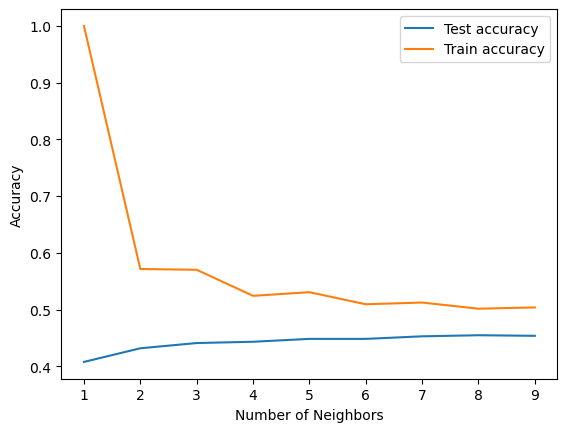

In [18]:
# Plot the relationship between number of neighbors and accuracy

plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

PARAMETERS: X = scaled weather data y = answers data random_state = 46 k_range = 1-9

### Observations

- The **training accuracy** is very high (close to 1.0) when k = 1. This indicates that the model is likely overfitting to the training data when k=1.
- As the number of neighbors increases, the training accuracy decreases. This is expected because a higher k smooths out the decision boundary, making the model less sensitive to the training data specifics.
- The **test accuracy** is relatively low for k = 1, indicating poor generalization and overfitting.
- As k increases from 1 to 9, the test accuracy gradually improves and stabilizes. This suggests that higher values of k help the model generalize better, though there is a point where increasing k further does not significantly improve the test accuracy.

### Interpretation

- **Overfitting:** when k = 1, the model perfectly memorizes the training data but performs poorly on the test data. This is a classic case of overfitting.
- **Bias-variance tradeoff:** lower values of k (e.g., k = 1) result in a high-variance model that is sensitive to the training data, leading to overfitting. Higher values of k introduce more bias, making the model more stable and less sensitive to noise in the training data, thus improving generalization to the test data.

## 4. Plotting Multilabel Confusion Matrix

In [19]:
locations = list({x.split("_")[0] for x in weather.columns if x not in ['MONTH', 'DATE']})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

/Users/giadairene/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Weather Station: BASEL, Accuracy: 88.97%
Weather Station: BELGRADE, Accuracy: 86.67%
Weather Station: BUDAPEST, Accuracy: 87.85%
Weather Station: DEBILT, Accuracy: 91.39%
Weather Station: DUSSELDORF, Accuracy: 90.89%
Weather Station: HEATHROW, Accuracy: 88.53%
Weather Station: KASSEL, Accuracy: 92.11%
Weather Station: LJUBLJANA, Accuracy: 88.92%
Weather Station: MAASTRICHT, Accuracy: 91.55%
Weather Station: MADRID, Accuracy: 88.46%
Weather Station: MUNCHENB, Accuracy: 90.71%
Weather Station: OSLO, Accuracy: 91.83%
Weather Station: SONNBLICK, Accuracy: 100.00%
Weather Station: STOCKHOLM, Accuracy: 90.57%
Weather Station: VALENTIA, Accuracy: 96.22%


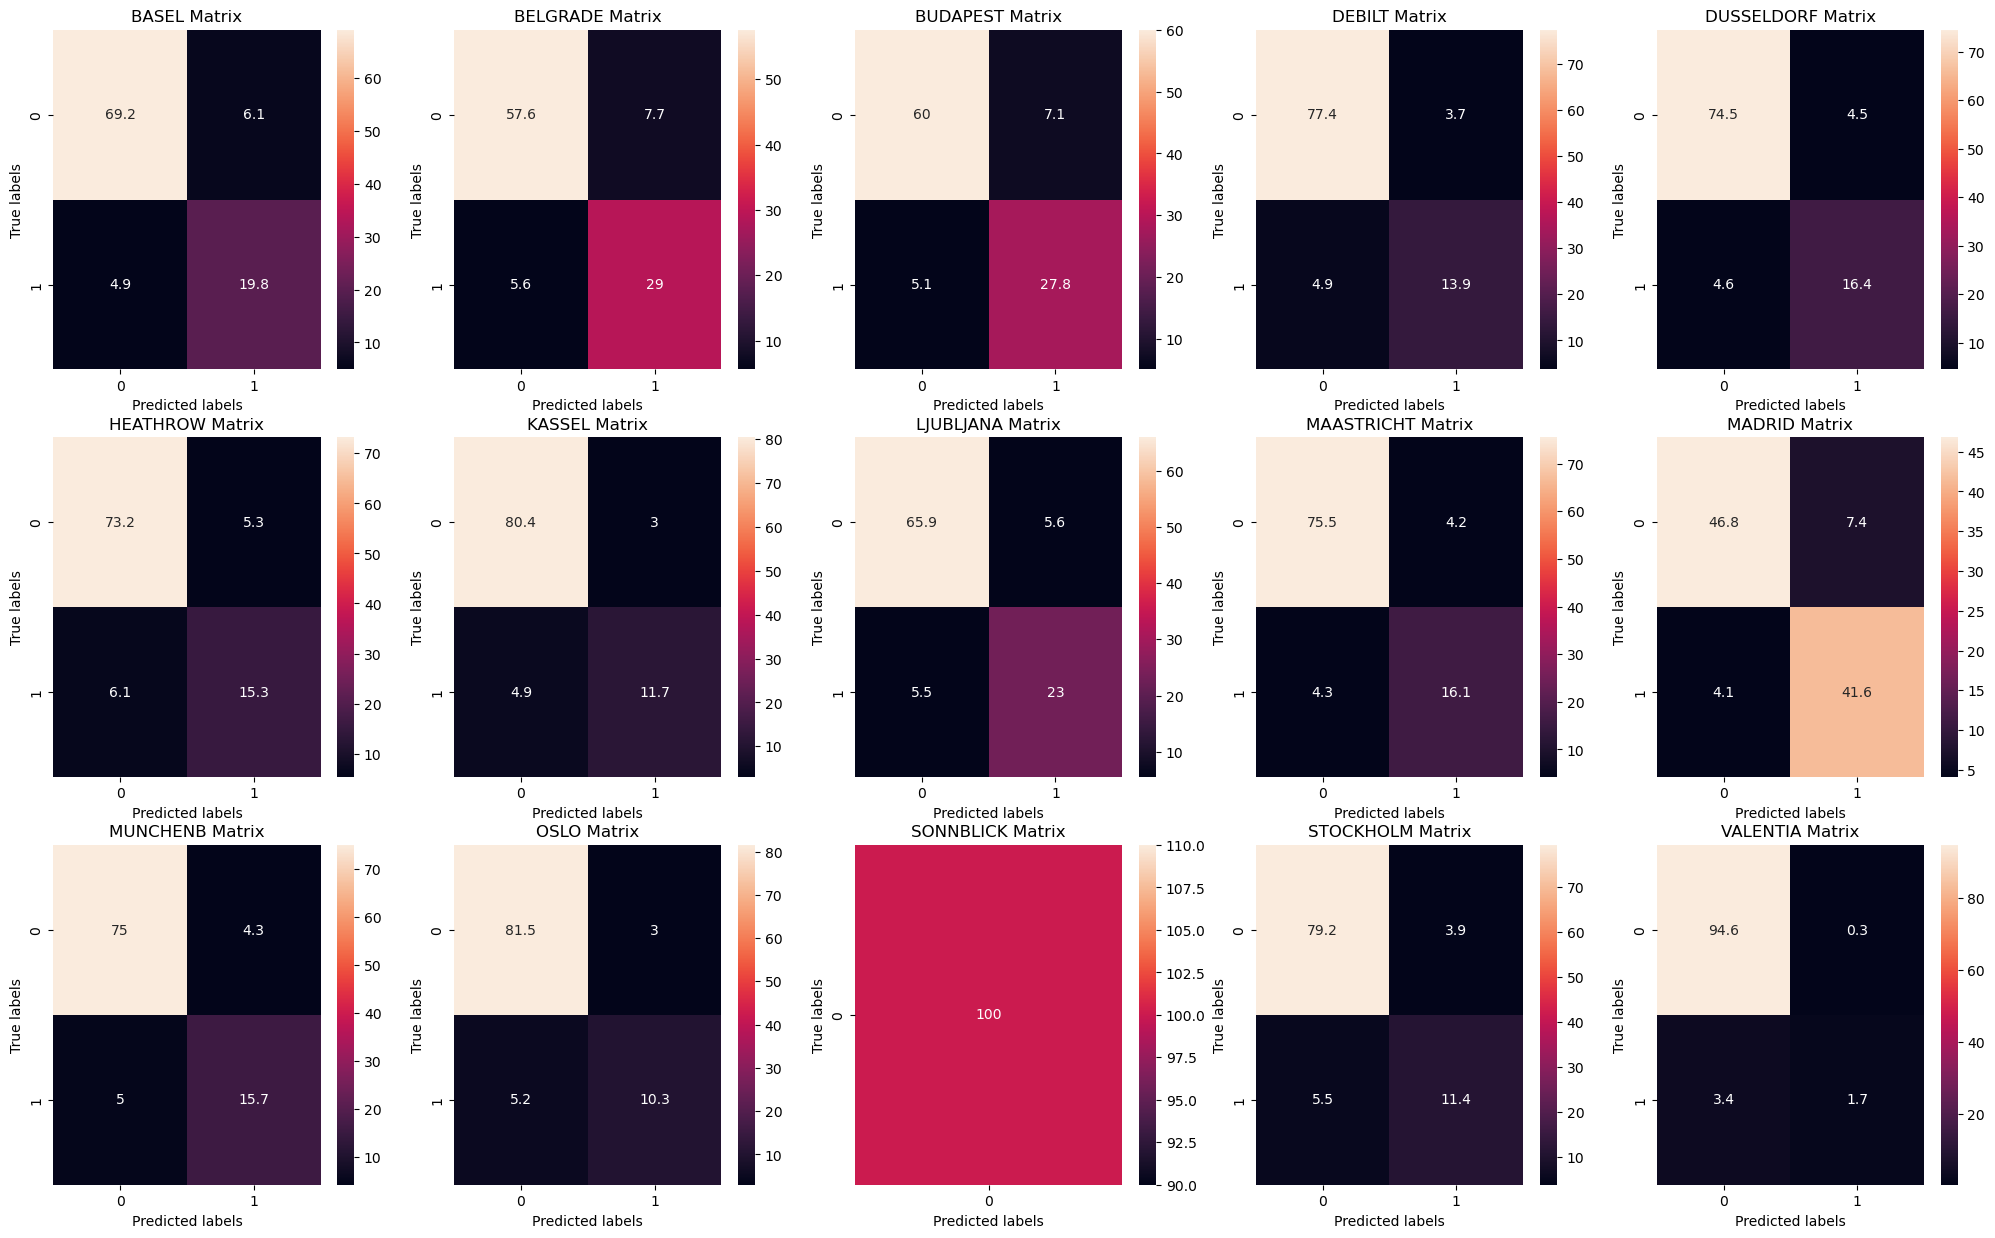

In [21]:
key = "_pleasant_weather"
stations = []
accuracy_rates = []  # List to store accuracy rates for each station
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        
        # Check if confusion matrix has the expected shape
        if cm.shape == (2, 2):
            # Calculate accuracy for 2x2 confusion matrix
            accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm) # True positives + True negatives / Total samples
        else:
            # Handle the case where only one class is present in y_true or y_pred
            accuracy = cm[0, 0] / np.sum(cm)
        
        accuracy_rates.append((name, accuracy))
        
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(np.round(100*cm/np.sum(cm), decimals=1), annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data.
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        
# Print the accuracy rates for each station
for station, accuracy in accuracy_rates:
    print(f"Weather Station: {station}, Accuracy: {accuracy:.2%}")

In [23]:
# Calculate the average accuracy across all stations

average_accuracy = sum(accuracy for station, accuracy in accuracy_rates) / len(accuracy_rates)
print(f"Average Accuracy Across All Stations: {average_accuracy:.2%}")

Average Accuracy Across All Stations: 90.98%


In [22]:
# Check for accuracy

y_pred = knn.predict(X_train)
print("Training Accuracy:", accuracy_score(y_pred, y_train))

y_pred_test = knn.predict(X_test)
print("Test Accuracy:", accuracy_score(y_pred_test, y_test))

Training Accuracy: 0.50371833604462
Test Accuracy: 0.45364238410596025


### Interpretation

- **Low accuracy:** both the training and test accuracies are relatively low, slightly above 50% for training and around 45% for testing. This suggests that the model is struggling to capture the underlying patterns in the data.
- **Small gap between training and test accuracy:** the small gap between training and test accuracy (approximately 5%) indicates that our model is not overfitting.

### Potential issues

- **Underfitting:** the low accuracy on both the training and test sets suggests that this model might be underfitting. This means that the KNN model is too simple and is not able to capture the complexities of the data.
- **Model complexity:** KNN is a non-parametric model, and its performance can be sensitive to the choice of the number of neighbors (k). We may need to experiment with different values of k or adjust other hyperparameters to improve performance.